<a href="https://colab.research.google.com/github/RFJC21/Regression_polynomial_ann/blob/master/HousePrices_ANN_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import data from scikitlearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas_profiling 

# Multivariate Linear Regression vs ANN Keras Regression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [381]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [186]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,253.500000,146.213884,1.00000,127.250000,253.50000,379.750000,506.0000
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


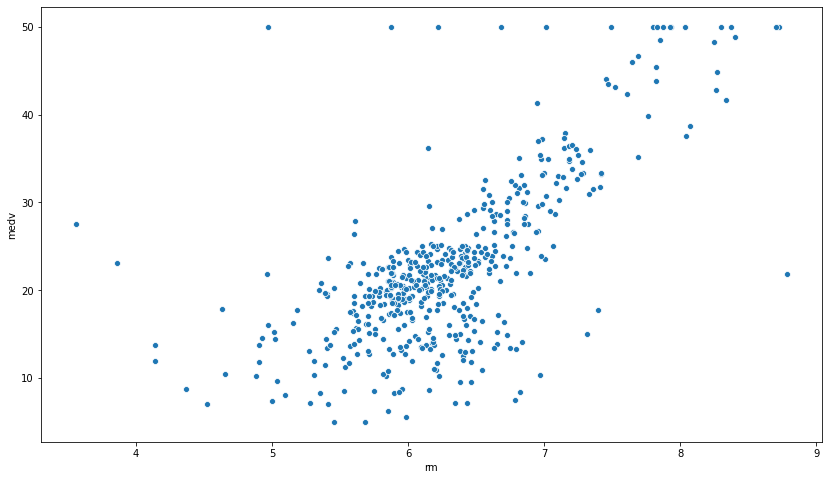

In [387]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='rm',y='medv',data=df)

In [0]:
df=df.drop('Unnamed: 0',axis=1)

In [188]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


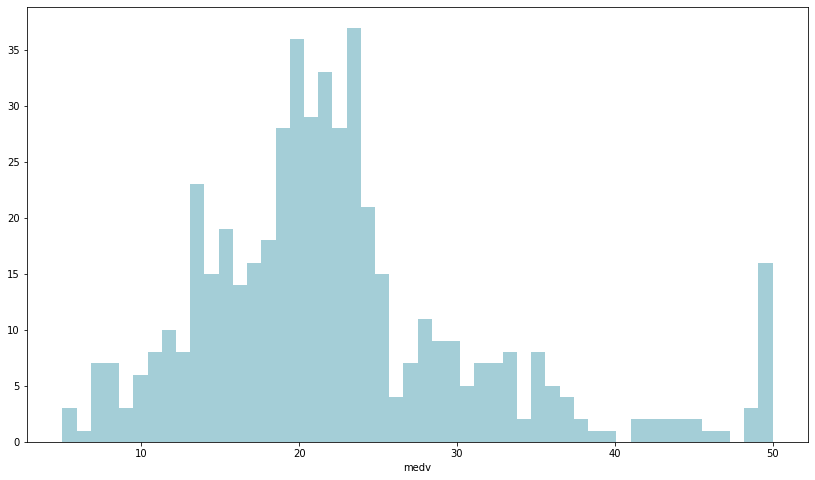

In [189]:
plt.figure(figsize=(14,8))
sns.distplot(df['medv'],bins=50, kde=False,color='#1c869c')

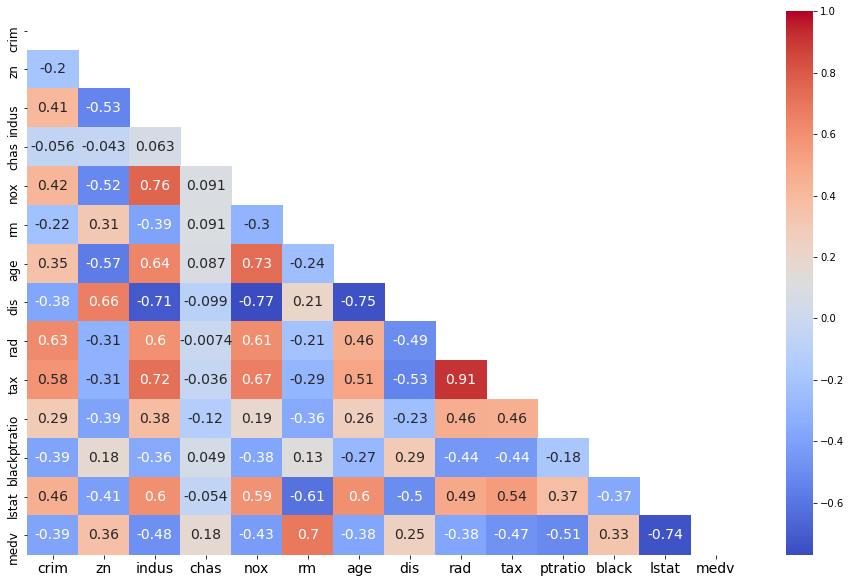

In [190]:
correlation=df.corr()

mask=np.zeros_like(df.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

#Heat Map com matplotlib and seaborn
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, cmap="coolwarm",annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

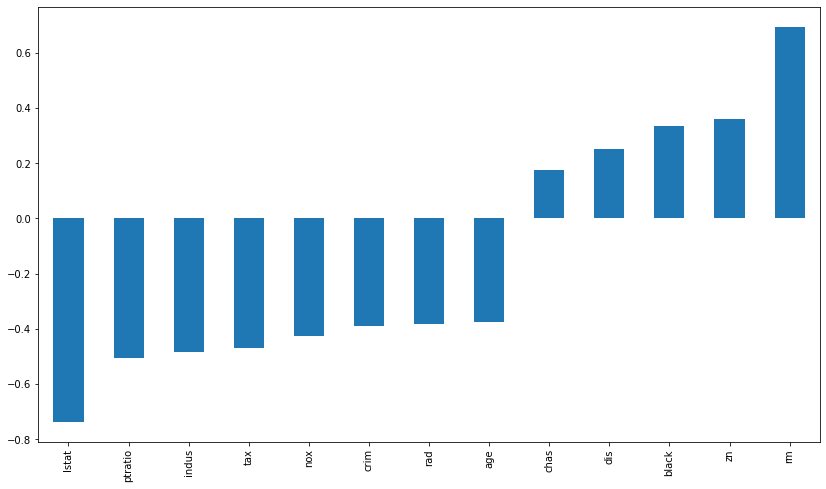

In [191]:
plt.figure(figsize=(14,8))
df.corr()['medv'].sort_values().drop('medv').plot(kind='bar')

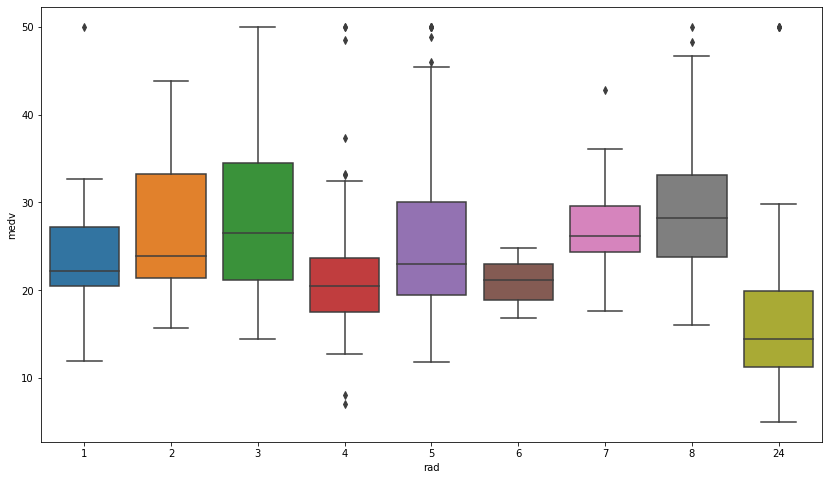

In [192]:
plt.figure(figsize=(14,8))
sns.boxplot(x='rad',y='medv',data=df)

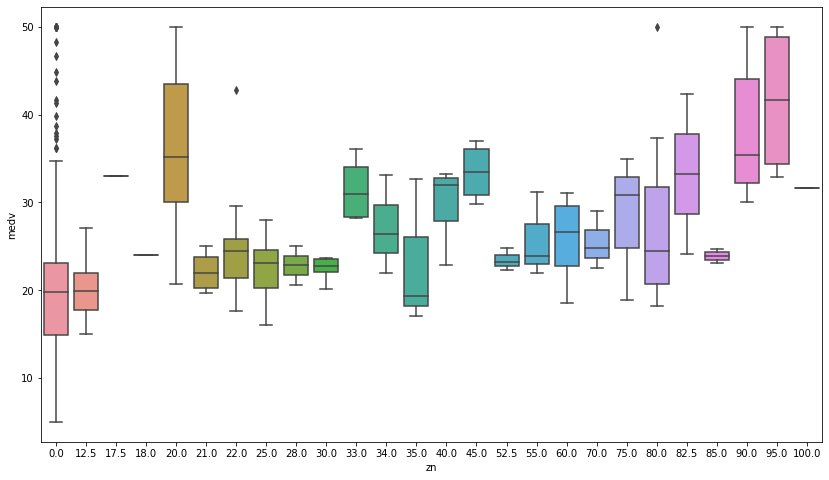

In [193]:
plt.figure(figsize=(14,8))
sns.boxplot(x='zn',y='medv',data=df)

# Multivariate Linear Regression

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [366]:
X

array([[1.0e+00, 6.3e-03, 1.8e+01, ..., 1.5e+01, 4.0e+02, 5.0e+00],
       [2.0e+00, 2.7e-02, 0.0e+00, ..., 1.8e+01, 4.0e+02, 9.1e+00],
       [3.0e+00, 2.7e-02, 0.0e+00, ..., 1.8e+01, 3.9e+02, 4.0e+00],
       ...,
       [5.0e+02, 6.1e-02, 0.0e+00, ..., 2.1e+01, 4.0e+02, 5.6e+00],
       [5.0e+02, 1.1e-01, 0.0e+00, ..., 2.1e+01, 3.9e+02, 6.5e+00],
       [5.1e+02, 4.7e-02, 0.0e+00, ..., 2.1e+01, 4.0e+02, 7.9e+00]])

# Scale Features

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc=StandardScaler()
X=sc.fit_transform(X)

# Create Model

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fit Model

In [369]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [370]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[24.7 22.6]
 [24.1 50. ]
 [27.3 23. ]
 [12.2  8.3]
 [21.7 21.2]
 [19.5 19.9]
 [20.6 20.6]
 [21.3 18.7]
 [18.8 16.1]
 [19.9 18.6]
 [ 4.7  8.8]
 [16.4 17.2]
 [17.3 14.9]
 [ 5.7 10.5]
 [38.2 50. ]
 [32.5 29. ]
 [22.6 23. ]
 [37.1 33.3]
 [31.1 29.4]
 [23.5 21. ]
 [24.7 23.8]
 [25.  19.1]
 [20.8 20.4]
 [30.5 29.1]
 [22.7 19.3]
 [10.2 23.1]
 [17.9 19.6]
 [18.6 19.4]
 [35.9 38.7]
 [21.2 18.7]
 [18.5 14.6]
 [18.  20. ]
 [19.9 20.5]
 [24.1 20.1]
 [29.3 23.6]
 [17.2 16.8]
 [11.3  5.6]
 [22.5 50. ]
 [17.6 14.5]
 [15.6 13.3]
 [26.3 23.9]
 [21.1 20. ]
 [22.1 19.8]
 [15.7 13.8]
 [22.7 16.5]
 [25.5 21.6]
 [20.1 20.3]
 [20.9 17. ]
 [10.3 11.8]
 [24.5 27.5]
 [18.8 15.6]
 [17.  23.1]
 [24.7 24.3]
 [30.1 42.8]
 [13.5 15.6]
 [22.1 21.7]
 [20.6 17.1]
 [15.1 17.2]
 [13.7 15. ]
 [20.  21.7]
 [17.3 18.6]
 [21.6 21. ]
 [33.1 33.1]
 [31.4 31.5]
 [17.8 20.1]
 [33.  29.8]
 [18.9 15.2]
 [20.2 15. ]
 [19.2 27.5]
 [23.  22.6]
 [23.2 20. ]
 [24.3 21.4]
 [31.  23.5]
 [28.8 31.2]
 [26.1 23.7]
 [ 5.3  7.4]
 [37.1 48.3]

In [371]:
pd.DataFrame({'y_pred: ':y_pred, 'y_reeal: ':y_test})

,y_pred:,y_reeal:
0,24.675092,22.6
1,24.066201,50.0
2,27.331221,23.0
3,12.226360,8.3
4,21.699298,21.2
...,...,...
97,25.583103,24.7
98,15.597159,14.1
99,18.190181,18.7
100,25.469171,28.1


# Evaluate

In [372]:
# r_squared for trainning and test data
print('Trainning data r_squared: ', regressor.score(X_train,y_train))
print('Test data r_squared: ', regressor.score(X_test,y_test))

Trainning data r_squared:  0.7693101100640507
Test data r_squared:  0.581902374475493


In [203]:
df.head(11)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [204]:
x_incl_const=sm.add_constant(X_train)
model=sm.OLS(y_train,x_incl_const)
results=model.fit()
results.pvalues

array([7.9e-281, 1.2e-003, 2.1e-003, 9.3e-001, 9.8e-003, 1.5e-004,
       6.8e-015, 8.3e-001, 2.8e-010, 5.6e-004, 5.1e-003, 1.7e-013,
       6.3e-003, 5.3e-018])

In [348]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [0]:
columns=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']

In [360]:
pd.DataFrame({ 'columns: ':columns,'p-values: ':results.pvalues})

,columns:,p-values:
0,crim,7.880479e-281
1,zn,1.222501e-03
2,indus,2.060526e-03
3,chas,9.311050e-01
4,nox,9.826245e-03
5,rm,1.503121e-04
6,age,6.837385e-15
7,dis,8.276851e-01
8,rad,2.771759e-10
9,tax,5.570378e-04


# Predictions

In [0]:
df1=df.drop('medv',axis=1)

In [206]:
house_prediction=df1.head(10)
house_prediction

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [0]:
house_prediction=sc.transform(house_prediction.values.reshape(-1,13))

In [0]:
pred_houses = regressor.predict(house_prediction)

In [209]:
pred_houses

array([30.5, 25.2, 30.5, 28.6, 28. , 25.3, 23.6, 20.3, 12.7, 19.7])

In [256]:
df_lr = pd.DataFrame(pred_houses, columns=['Predictions_lr'])
df_lr

,Predictions_lr
0,30.499498
1,25.172480
2,30.546654
3,28.606948
4,27.969583
5,25.337665
6,23.603188
7,20.256071
8,12.651475
9,19.699869


# Evaluate

In [210]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3.8429092204444966

In [211]:
df['medv'].mean()

22.532806324110698

# ANN Regression

In [0]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [320]:
df = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
df=df.drop('Unnamed: 0',axis=1)

# Train and scale features

In [0]:
#.values because of the validation data
X=df.drop('medv',axis=1).values
y=df['medv'].values

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model with early stopping and dropout layer

In [0]:
model=Sequential()

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [326]:
X_test.shape

(102, 13)

In [0]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [328]:
# also pass Validation Data -> after every epoch on trainning in the training data, it runs on the test data anc check the loss on the test data
# because of the size of trainning data, lets use batch sizes
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),Callbacks=[early_stop],epochs=600)

Epoch 1/600
13/13 [==============================] - 0s 9ms/step - loss: 570.0638 - val_loss: 480.5715
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 446.1112 - val_loss: 263.4232
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 196.5227 - val_loss: 121.5171
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 130.0983 - val_loss: 75.6613
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 90.3163 - val_loss: 61.9905
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 71.7352 - val_loss: 59.6751
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 62.5716 - val_loss: 59.7928
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 54.2420 - val_loss: 57.3257
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 54.3220 - val_loss: 54.1194
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 44.3967 - 

# Plot Loss

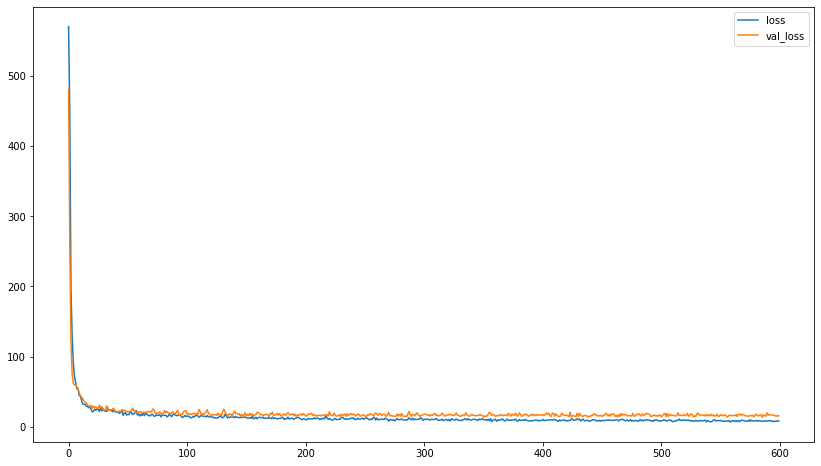

In [329]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

In [0]:
predictions=model.predict(X_test)

In [331]:
predictions

array([[23.6],
       [26.6],
       [24.5],
       [10.1],
       [20.2],
       [20. ],
       [21.2],
       [19.9],
       [19.1],
       [18.9],
       [ 8.8],
       [11.9],
       [14.4],
       [ 8.2],
       [48.1],
       [33.7],
       [21.6],
       [38.5],
       [31. ],
       [21.6],
       [22.9],
       [21.1],
       [21.1],
       [26.2],
       [20.4],
       [25.6],
       [17.5],
       [18.3],
       [39.8],
       [18.8],
       [16.4],
       [18.6],
       [19.9],
       [20.7],
       [25.3],
       [20.5],
       [ 9.3],
       [31.8],
       [14.4],
       [15.4],
       [23.3],
       [21.1],
       [20.9],
       [17.8],
       [21. ],
       [22.8],
       [20.5],
       [17. ],
       [15.7],
       [22.5],
       [13.1],
       [22.9],
       [21.4],
       [38. ],
       [15.2],
       [21.1],
       [18.3],
       [18.3],
       [16. ],
       [20.9],
       [19.2],
       [20.9],
       [32.5],
       [32. ],
       [19.4],
       [31.3],
       [16

# Evaluate

In [342]:
df['medv'].mean()

22.532806324110698

In [332]:
mean_absolute_error(y_test,predictions)

2.5306446225035417

# Predictions

In [0]:
df2=df.drop('medv',axis=1)

In [334]:
house_prediction=df2.head(10)
house_prediction

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [0]:
house_ann=scaler.transform(house_prediction.values.reshape(-1,13))

In [0]:
predictions_ann=model.predict(house_ann)

In [337]:
df_ann = pd.DataFrame(predictions_ann, columns=['Predictions_ann'])
df_ann

,Predictions_ann
0,25.101952
1,22.787239
2,30.726530
3,33.756142
4,33.590584
5,27.313545
6,21.191311
7,22.051537
8,18.007427
9,21.153299


In [338]:
data_predicted= pd.concat([df, df_ann,df_lr], axis=1)
data_predicted.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Predictions_ann,Predictions_lr
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.101952,30.499498
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.787239,25.172480
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.726530,30.546654
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.756142,28.606948
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,33.590584,27.969583
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,27.313545,25.337665
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.191311,23.603188
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,22.051537,20.256071
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,18.007427,12.651475
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,21.153299,19.699869


Text(0.5, 1.0, 'ANN')

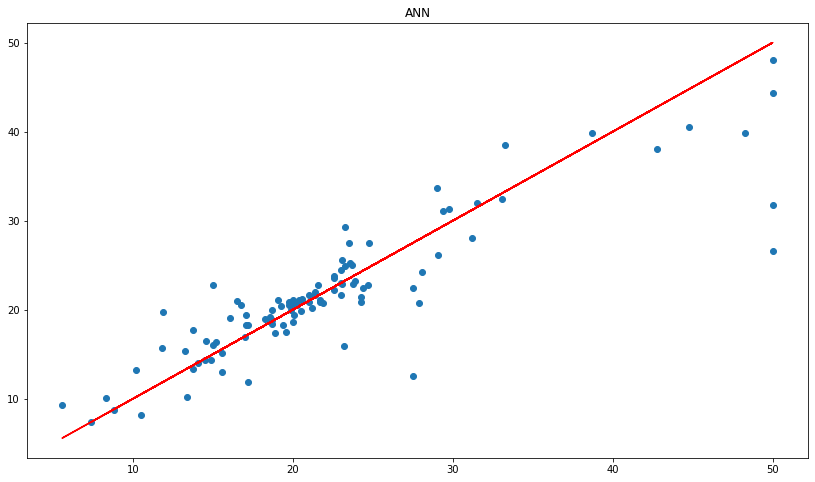

In [339]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.title('ANN')

Text(0.5, 1.0, 'LR')

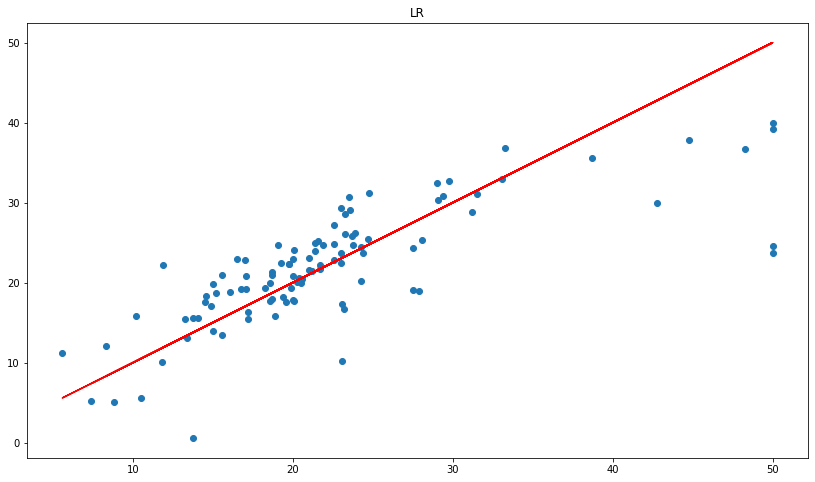

In [263]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')
plt.title('LR')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

# Polynominal Regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [391]:
df = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
 poly_features = PolynomialFeatures(degree=2)

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
X_train_poly = poly_features.fit_transform(X_train)

In [396]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_test_predict_poly = poly_model.predict(poly_features.fit_transform(X_test))

In [400]:
y_test_predict_poly

array([ 23.2,  28.5,  27.5,   6.9,  20.8,  21. ,  21.7,  20. ,  18.6,
        24.8,   9.9,  15.8,  13.8,   4.3,  45.9,  32.1,  23. ,  38.9,
        32.4,  21.5,  23. ,  22. ,  20.1,  26.3,  16.6,  25.1,  16. ,
        18.7,  34.8,  14.8,  18.4,  17.5,  19.5,  17.7,  26.3,  16. ,
         7.6,  38.4,  17.2,  15.1,  21.5,  17.1,  20.8,  18.5,  22.5,
        20.2,  19.3,  12. ,  14.2,  23.2, -15.6,  26. ,  21.7,  50.6,
         5.3,  20.7,  15.2,  19.2,  27.5,  19.3,  21.5,  21.7,  31.1,
        31. ,  17.9,  29.9,  15. ,  20.4,  17.2,  19.2,  17.6,  22.5,
        29.1,  28.6,  27.4,   6.5,  42.3,  22.5,  25.8,  18.4,  25.2,
        18.6,  22.8,  41.5,  44.1,  22.6,  23.1,  13.6,  33.9,  16.5,
        28.9,   8.5,  23.2,  27.5,  16.3,  19.7,  12.9,  31.5,  13.3,
        16.2,  24.4,  19.1])

In [0]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict_poly))
r2_test = r2_score(y_test, y_test_predict_poly)
  

In [405]:
rmse_test

5.530545453977526

In [426]:
print('Trainning data r_squared: ', poly_model.score(X_train_poly,y_train))

Trainning data r_squared:  0.9518402891629278


In [408]:
mean_absolute_error(y_test,y_test_predict_poly)

3.5950201843299125

# Visualizing

Text(0.5, 1.0, 'Poly')

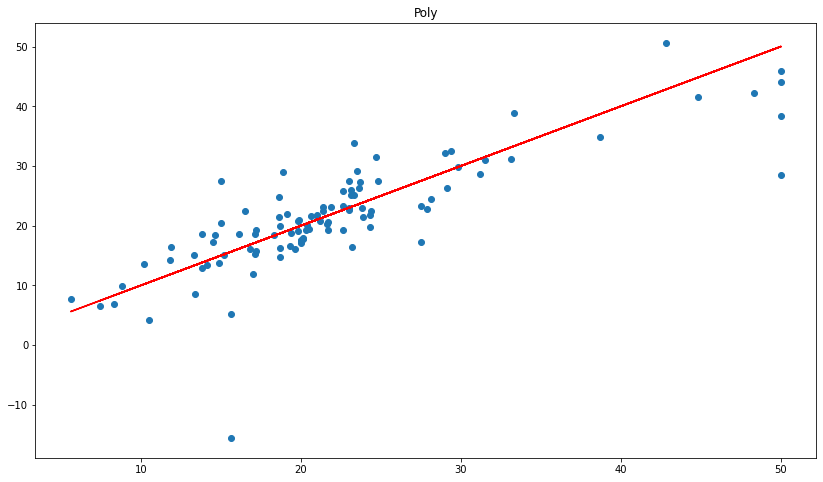

In [436]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,y_test_predict_poly)
plt.plot(y_test,y_test,'r')
plt.title('Poly')

ValueError: ignored

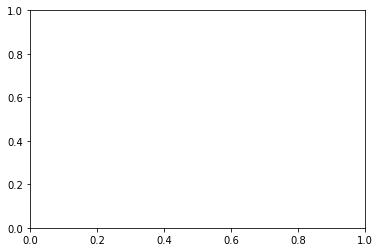

In [442]:
plt.scatter(X_test, y_test_predict_poly, color = 'red')
plt.plot(X_test, poly_model.predict(poly_features.fit_transform(X_train)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [0]:
df3=df.drop('medv',axis=1)

In [417]:
house_prediction_poly=df3.head(10)
house_prediction_poly

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [0]:
house_prediction_poly=poly_model.predict(poly_features.fit_transform(house_prediction_poly))

In [424]:
house_prediction_poly

array([26.2, 20.2, 31.2, 34.5, 33.3, 28.2, 21.9, 18. , 14.7, 22.3])

In [425]:
df_poly = pd.DataFrame(house_prediction_poly, columns=['Predictions_poly'])
df_poly

,Predictions_poly
0,26.185130
1,20.242273
2,31.229378
3,34.547726
4,33.330851
5,28.211071
6,21.896255
7,18.026796
8,14.739570
9,22.343196


In [427]:
data_predicted= pd.concat([df, df_ann,df_lr,df_poly], axis=1)
data_predicted.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Predictions_ann,Predictions_lr,Predictions_poly
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.101952,30.499498,26.185130
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.787239,25.172480,20.242273
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.726530,30.546654,31.229378
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.756142,28.606948,34.547726
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,33.590584,27.969583,33.330851
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,27.313545,25.337665,28.211071
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.191311,23.603188,21.896255
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,22.051537,20.256071,18.026796
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,18.007427,12.651475,14.739570
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,21.153299,19.699869,22.343196
